In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
df = pd.read_csv("WineQT.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


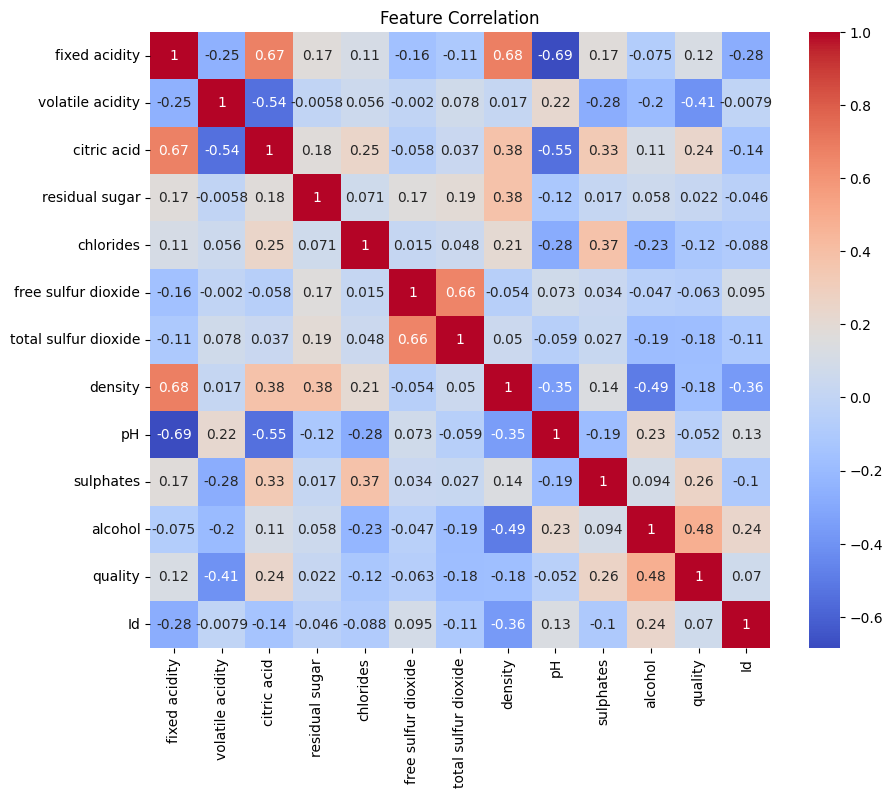

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [8]:
X = df.drop('quality', axis=1)
y = df['quality']

In [9]:
y = y.apply(lambda value: 1 if value >= 7 else 0)    

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
y_pred = model.predict(X_test)

In [14]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[196   5]
 [ 10  18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       201
           1       0.78      0.64      0.71        28

    accuracy                           0.93       229
   macro avg       0.87      0.81      0.83       229
weighted avg       0.93      0.93      0.93       229


Accuracy Score:
0.9344978165938864


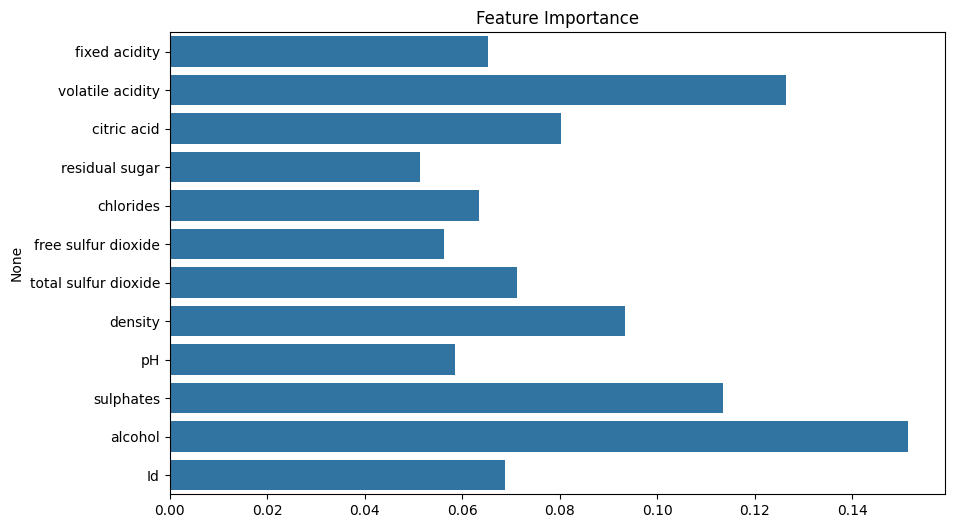

In [15]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()

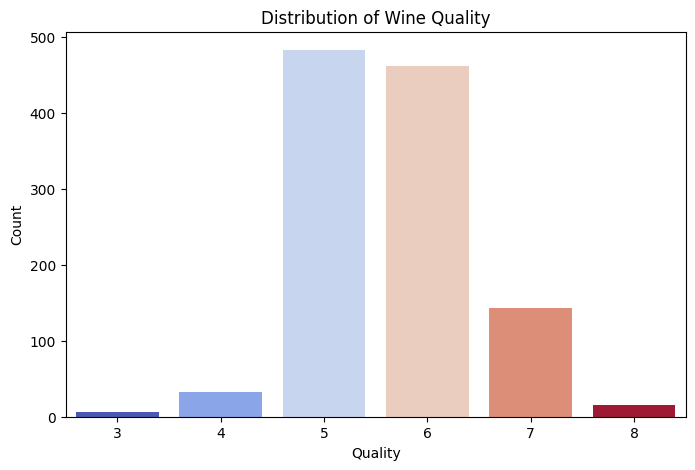

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, hue='quality', palette='coolwarm', legend=False)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


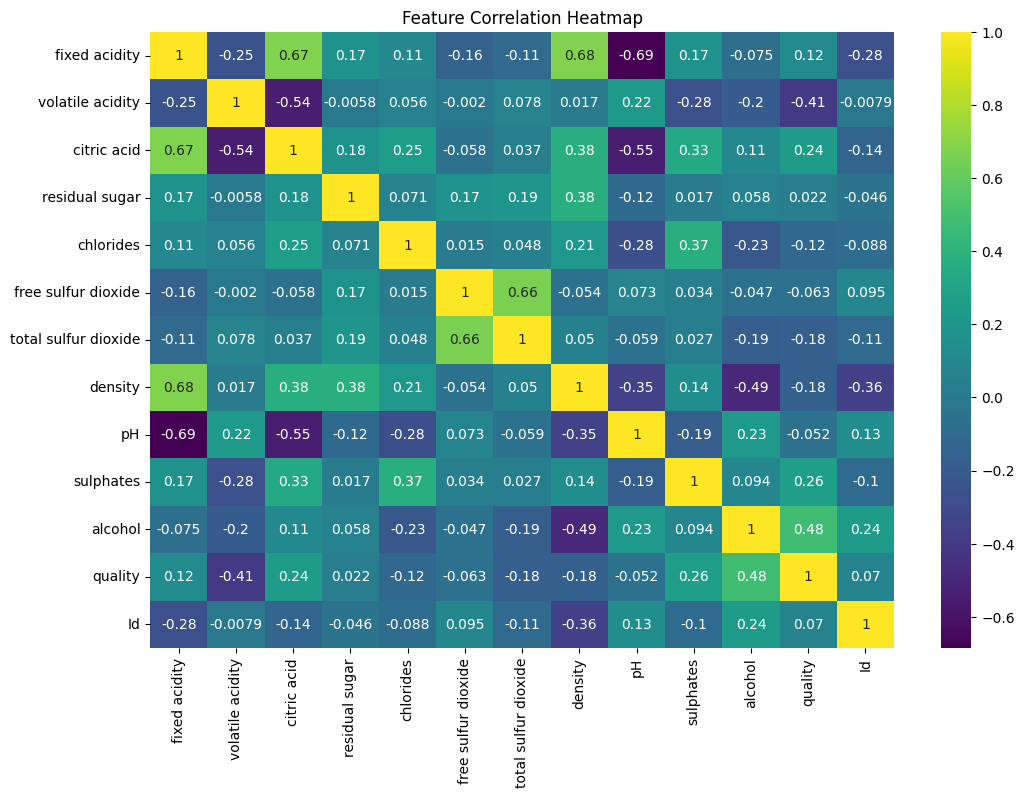

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Feature Correlation Heatmap')
plt.show()

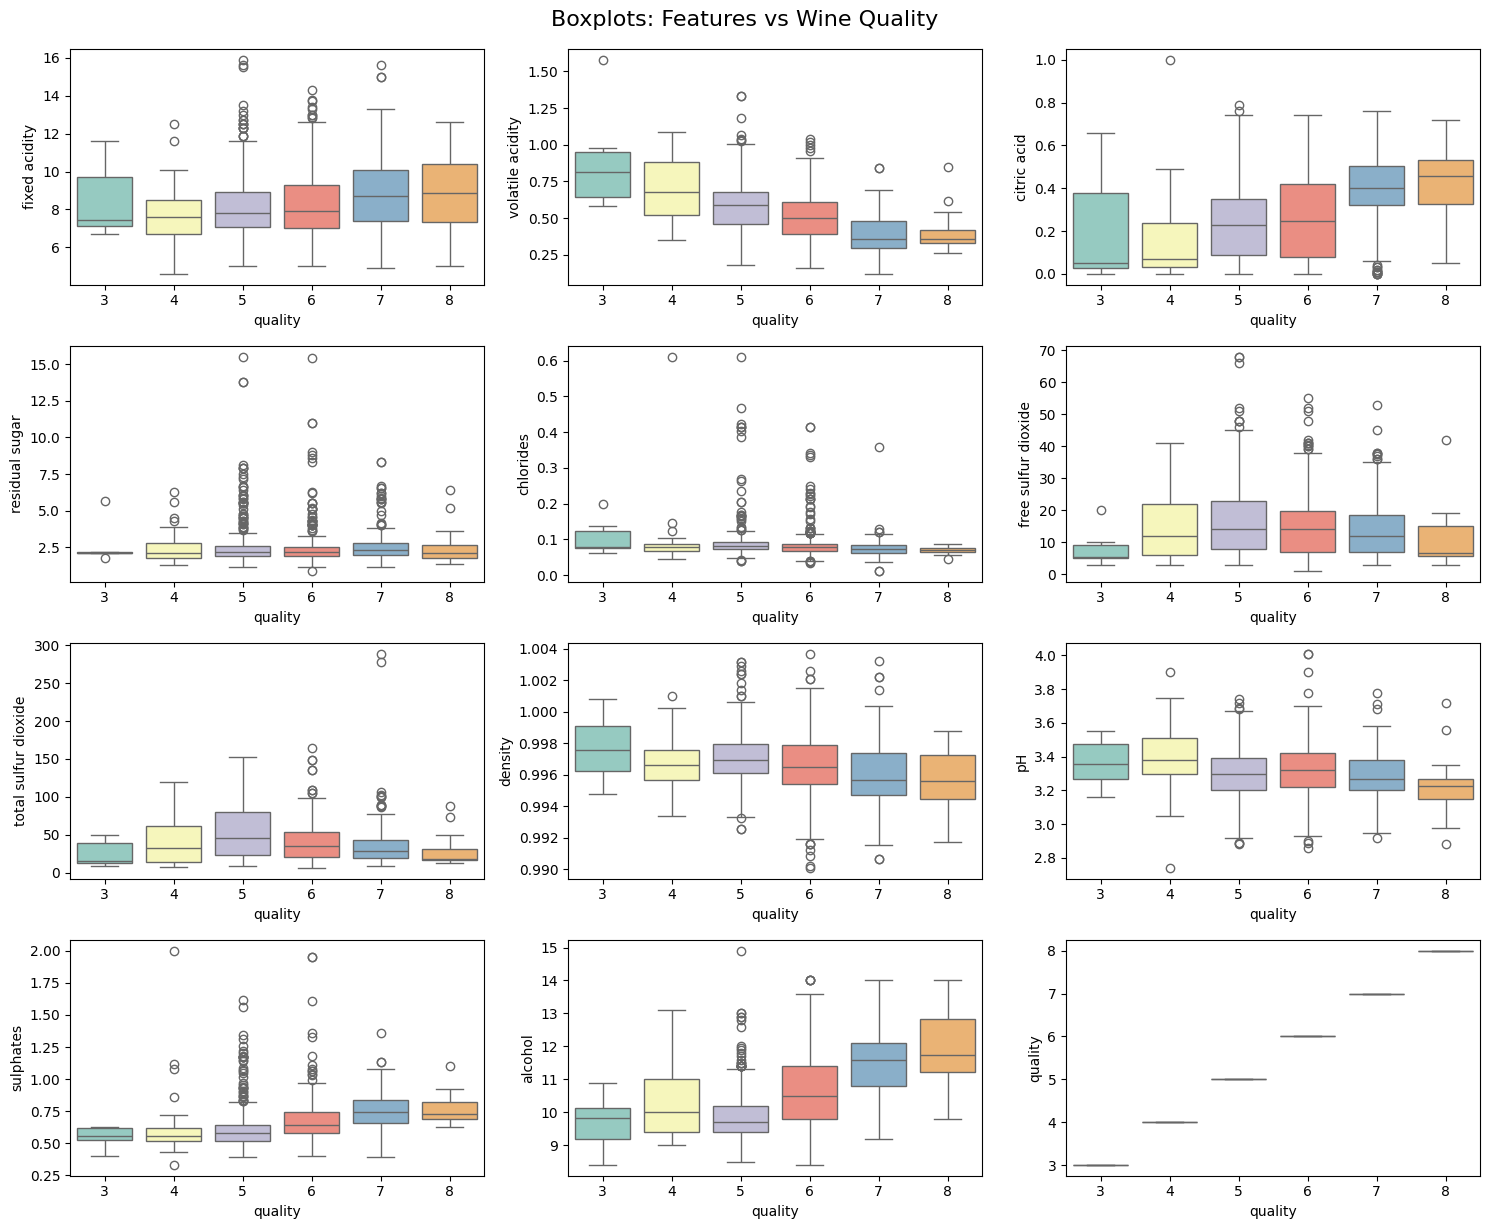

In [18]:
features = df.columns[:-2] if 'quality_label' in df.columns else df.columns[:-1]

plt.figure(figsize=(15, 12))
for i, col in enumerate(features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x='quality', y=col, data=df, hue='quality', palette='Set3', legend=False)
    plt.tight_layout()
plt.suptitle('Boxplots: Features vs Wine Quality', fontsize=16, y=1.02)
plt.show()

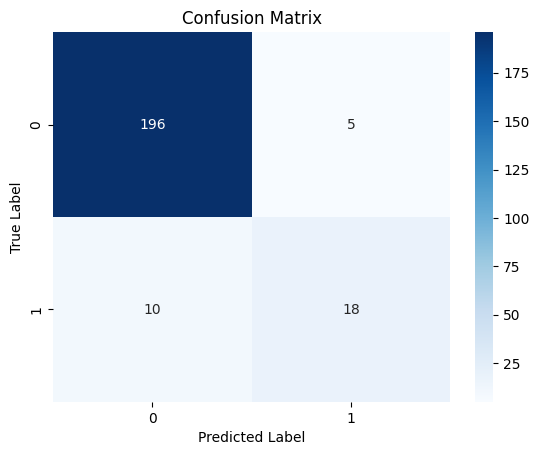

In [19]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [22]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


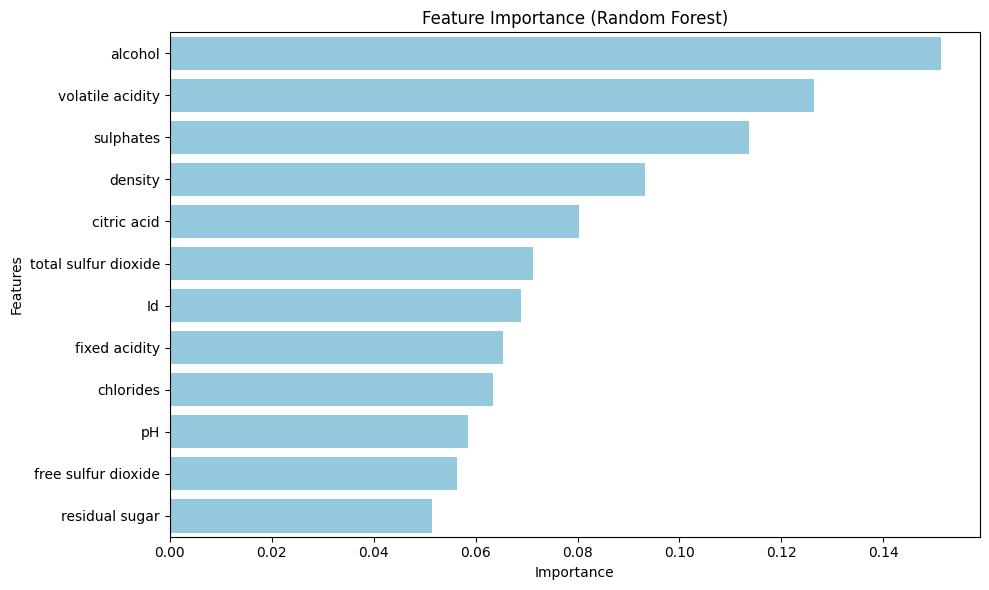

In [23]:
importances = clf.feature_importances_          # feature importances from model
feature_names = X.columns                       # feature names
indices = np.argsort(importances)[::-1]         # sort indices by importance (descending)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices], color='skyblue')  # fixed
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("WineQT.csv")

# Features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prediction
y_pred = regressor.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.38242835212919696
R² Score: 0.31276385395081874


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Convert quality to binary (Good: 1 if >=7, else Bad: 0)
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Features and labels
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

# Split & Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[196   5]
 [ 10  18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       201
           1       0.78      0.64      0.71        28

    accuracy                           0.93       229
   macro avg       0.87      0.81      0.83       229
weighted avg       0.93      0.93      0.93       229

Accuracy Score: 0.9344978165938864


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling (only on X)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Id'],
      dtype='object')

In [31]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [32]:
# Your dataset has 12 features including Id
new_sample = [[7.4, 0.7, 0.0, 1.9, 0.076,
               11.0, 34.0, 0.9978, 3.51, 0.56, 9.4, 1234]]  # 12th value is dummy 'Id'

new_sample_scaled = scaler.transform(new_sample)
predicted_quality = model.predict(new_sample_scaled)
print("Predicted wine quality:", round(predicted_quality[0], 2))


Predicted wine quality: -0.14


In [33]:
import joblib

# Save model
joblib.dump(model, 'wine_quality_model.pkl')

# Save scaler
joblib.dump(scaler, 'wine_scaler.pkl')

print("✅ Model and scaler saved as .pkl files.")


✅ Model and scaler saved as .pkl files.


In [35]:
X = df.drop(["quality", "Id"], axis=1)


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pickle

# Load data
df = pd.read_csv("WineQT.csv")

# Drop nulls (if any)
df.dropna(inplace=True)

# ✅ Drop 'Id' from features
X = df.drop(['quality', 'Id'], axis=1)  # 11 features
y = df['quality']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
# Save model
with open("rf_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [40]:
# Load saved model and scaler
with open("rf_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

# ✅ New input sample — must match X exactly (11 values)
new_sample = [[7.4, 0.7, 0.0, 1.9, 0.076,
               11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]]

# ✅ Create DataFrame with correct column names (X.columns has 11 names)
new_df = pd.DataFrame(new_sample, columns=X.columns)

# Scale and predict
new_scaled = loaded_scaler.transform(new_df)
prediction = loaded_model.predict(new_scaled)

print("✅ Predicted Wine Quality:", prediction[0])


✅ Predicted Wine Quality: 5
